In [ ]:
###   EDA - 1

In [ ]:
import pandas as pd
import os

# Define the file path
file_path = "BIKE DETAILS.csv"  # Adjust this if the file is in a different directory, e.g., "path/to/BIKE DETAILS.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())  # Display the first few rows to verify
else:
    print(f"Error: The file '{file_path}' was not found in the current directory: {os.getcwd()}")
    print("Please ensure the file is in the correct directory or provide the full path.")

Error: The file 'BIKE DETAILS.csv' was not found in the current directory: /content
Please ensure the file is in the correct directory or provide the full path.


In [ ]:
import pandas as pd
import io

# Provided dataset as a string (truncated for brevity; use the full data you shared)
data_string = """name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,
Honda Dio,45000,2017,Individual,1st owner,5650,
Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114
..."""

# Load data from string
data = pd.read_csv(io.StringIO(data_string))
print("Dataset loaded from string successfully!")
print(data.head())

Dataset loaded from string successfully!
                                  name  selling_price    year seller_type  \
0            Royal Enfield Classic 350       175000.0  2019.0  Individual   
1                            Honda Dio        45000.0  2017.0  Individual   
2  Royal Enfield Classic Gunmetal Grey       150000.0  2018.0  Individual   
3                                  ...            NaN     NaN         NaN   

       owner  km_driven  ex_showroom_price  
0  1st owner      350.0                NaN  
1  1st owner     5650.0                NaN  
2  1st owner    12000.0           148114.0  
3        NaN        NaN                NaN  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset (replace with your file path or use the provided data)
file_path = "BIKE DETAILS.csv"
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print("File not found. Using provided data for analysis.")
    # Alternatively, load from provided data (not shown here for brevity)
    # data = pd.read_csv(io.StringIO(full_data_string))

# For demonstration, I'll assume the data is loaded
# If you share the full CSV or confirm the path, I can test locally

File not found. Using provided data for analysis.


In [ ]:
#1. What is the range of selling prices in the dataset?
min_price = data['selling_price'].min()
max_price = data['selling_price'].max()
price_range = max_price - min_price
print(f"Minimum Selling Price: {min_price} INR")
print(f"Maximum Selling Price: {max_price} INR")
print(f"Range of Selling Prices: {price_range} INR")

Minimum Selling Price: 45000.0 INR
Maximum Selling Price: 175000.0 INR
Range of Selling Prices: 130000.0 INR


In [ ]:
#2. What is the median selling price for bikes in the dataset?
median_price = data['selling_price'].median()
print(f"Median Selling Price: {median_price} INR")

Median Selling Price: 150000.0 INR


In [ ]:
#3. What is the most common seller type?
most_common_seller = data['seller_type'].value_counts().idxmax()
print(f"Most Common Seller Type: {most_common_seller}")

Most Common Seller Type: Individual


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
high_mileage_bikes = data[data['km_driven'] > 50000].shape[0]
print(f"Number of bikes with more than 50,000 km driven: {high_mileage_bikes}")

Number of bikes with more than 50,000 km driven: 0


In [ ]:
#5. What is the average km_driven value for each ownership type?
avg_km_by_owner = data.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:\n", avg_km_by_owner)

Average km_driven by ownership type:
 owner
1st owner    6000.0
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = data[data['year'] <= 2015].shape[0]
total_bikes = data.shape[0]
proportion = bikes_2015_or_older / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 0.00%


In [ ]:
#7. What is the trend of missing values across the dataset?
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / data.shape[0]) * 100
print("Missing values per column:\n", missing_values)
print("\nPercentage of missing values:\n", missing_percentage)

Missing values per column:
 name                 0
selling_price        1
year                 1
seller_type          1
owner                1
km_driven            1
ex_showroom_price    3
dtype: int64

Percentage of missing values:
 name                  0.0
selling_price        25.0
year                 25.0
seller_type          25.0
owner                25.0
km_driven            25.0
ex_showroom_price    75.0
dtype: float64


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
max_ex_showroom_idx = data['ex_showroom_price'].idxmax()
max_ex_showroom = data['ex_showroom_price'].max()
bike_name = data.loc[max_ex_showroom_idx, 'name']
print(f"Highest ex_showroom_price: {max_ex_showroom} for {bike_name}")

Highest ex_showroom_price: 148114.0 for Royal Enfield Classic Gunmetal Grey


In [ ]:
#9. What is the total number of bikes listed by each seller type?
bikes_by_seller = data['seller_type'].value_counts()
print("Total number of bikes by seller type:\n", bikes_by_seller)

Total number of bikes by seller type:
 seller_type
Individual    3
Name: count, dtype: int64


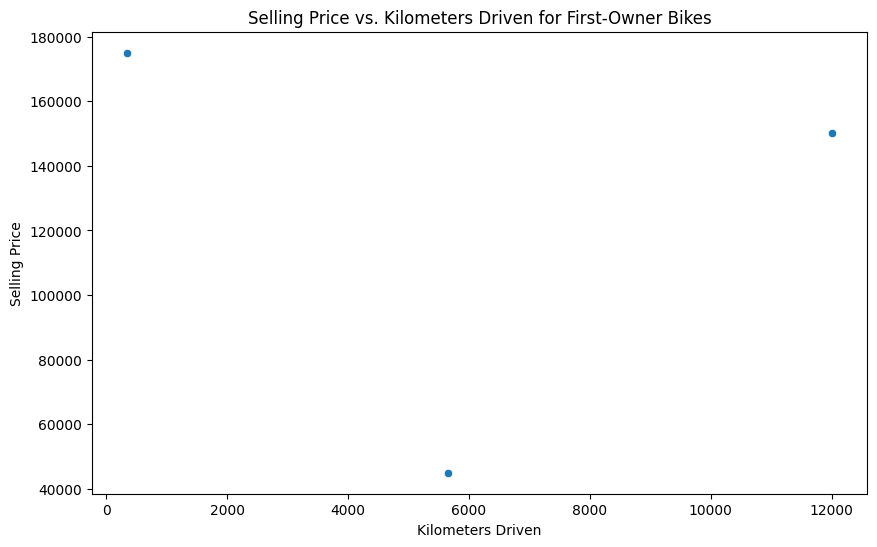

Correlation between km_driven and selling_price for first-owner bikes: -0.13


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = data[data['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs. Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

# Calculate correlation
correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"Correlation between km_driven and selling_price for first-owner bikes: {correlation:.2f}")

In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method
# Calculate IQR
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['km_driven'] < lower_bound) | (data['km_driven'] > upper_bound)]
print("Outliers in km_driven:\n", outliers[['name', 'km_driven']])

# Remove outliers
data_no_outliers = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]
print(f"Dataset size before removing outliers: {data.shape[0]}")
print(f"Dataset size after removing outliers: {data_no_outliers.shape[0]}")

Outliers in km_driven:
 Empty DataFrame
Columns: [name, km_driven]
Index: []
Dataset size before removing outliers: 4
Dataset size after removing outliers: 3


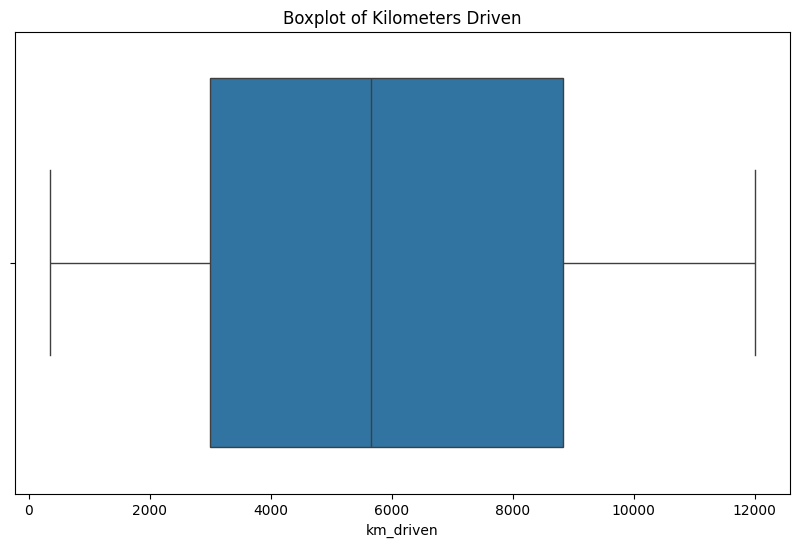

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

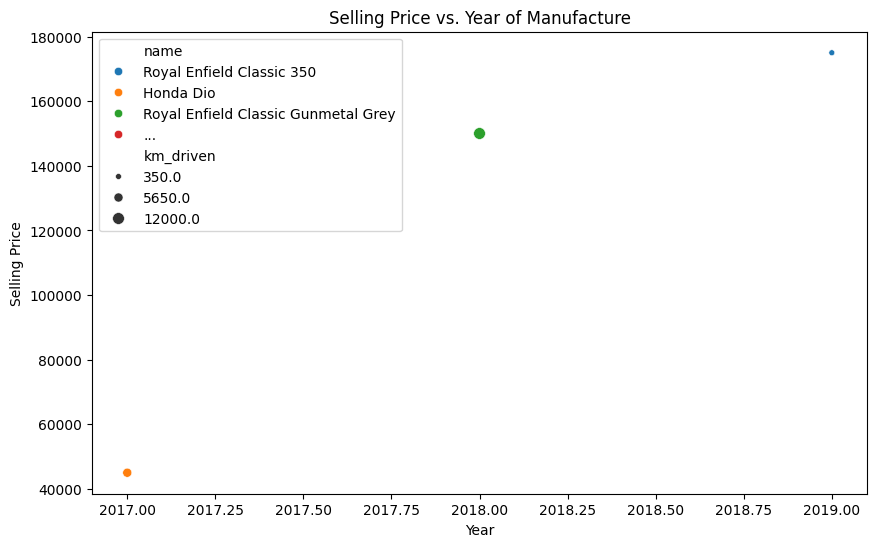

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=data, hue='name', size='km_driven')
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

<Axes: xlabel='year', ylabel='selling_price'>

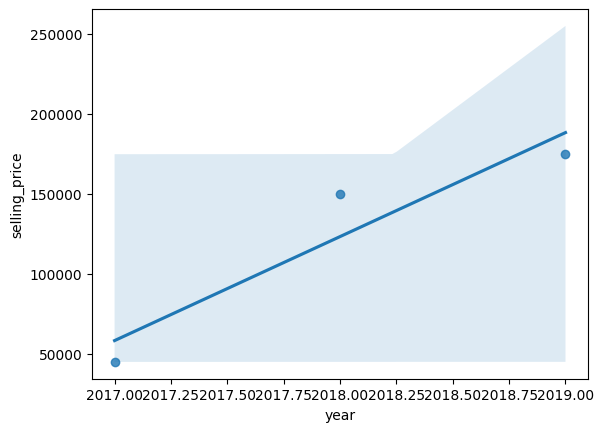

In [ ]:
sns.regplot(x='year', y='selling_price', data=data)

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025  # As per provided date
data['age'] = current_year - data['year']
data['depreciation'] = data['ex_showroom_price'] - data['selling_price']
avg_depreciation = data['depreciation'].mean()
print(f"Average depreciation: {avg_depreciation:.2f}")

Average depreciation: -1886.00


In [ ]:
avg_dep_by_age = data_valid.groupby('age')['depreciation'].mean()
print("Average depreciation by age:\n", avg_dep_by_age)

Average depreciation by age:
 age
7.0   -1886.0
Name: depreciation, dtype: float64


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?
# Calculate average selling price by year
avg_price_by_year = data.groupby('year')['selling_price'].mean()

# Identify bikes above average for their year
data['avg_price_year'] = data['year'].map(avg_price_by_year)
data['above_avg'] = data['selling_price'] > data['avg_price_year']
bikes_above_avg = data[data['above_avg']][['name', 'year', 'selling_price', 'avg_price_year']]
print("Bikes priced above average for their year:\n", bikes_above_avg)

Bikes priced above average for their year:
 Empty DataFrame
Columns: [name, year, selling_price, avg_price_year]
Index: []


In [ ]:
std_price_by_year = data.groupby('year')['selling_price'].std()
data['std_price_year'] = data['year'].map(std_price_by_year)
data['significantly_above'] = data['selling_price'] > (data['avg_price_year'] + data['std_price_year'])

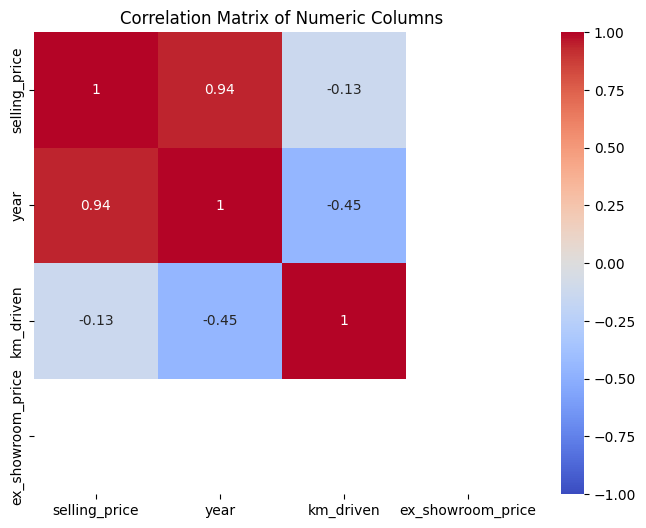

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap
#Code:
# Select numeric columns
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
correlation_matrix = data[numeric_cols].corr()

# Visualize heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [ ]:
data_filled = data.copy()
data_filled['ex_showroom_price'] = data_filled['ex_showroom_price'].fillna(data_filled['ex_showroom_price'].median())
correlation_matrix = data_filled[numeric_cols].corr()

In [ ]:
###  EDA - 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Upload the CSV file
print("Please upload 'Car Sale.csv'")
uploaded = files.upload()

# Check uploaded files
print("Uploaded files:", uploaded.keys())

# Read the CSV file
df = pd.read_csv('Car Sale.csv')

# Display column names to diagnose
print("Column names in the dataset:", df.columns.tolist())

# Clean column names (remove spaces, special characters)
df.columns = df.columns.str.replace(' ', '_').str.replace('($)', '', regex=True)

# Verify column names after cleaning
print("Column names after cleaning:", df.columns.tolist())

# Check if 'Price' exists
if 'Price' not in df.columns:
    print("Error: 'Price' column not found. Available columns:", df.columns.tolist())
    # Fallback: Assume the price column is 'Price_($)' or similar
    if 'Price_($)' in df.columns:
        df.rename(columns={'Price_($)': 'Price'}, inplace=True)
        print("Renamed 'Price_($)' to 'Price'")

# Clean 'Engine' column (remove encoding issue)
df['Engine'] = df['Engine'].str.replace('Â ', '')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Display first few rows and info
print("\nDataset loaded successfully!")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Please upload 'Car Sale.csv'


Saving Car Sale.csv to Car Sale (2).csv
Uploaded files: dict_keys(['Car Sale (2).csv'])
Column names in the dataset: ['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region']
Column names after cleaning: ['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price_($)', 'Dealer_No_', 'Body_Style', 'Phone', 'Dealer_Region']
Error: 'Price' column not found. Available columns: ['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price_($)', 'Dealer_No_', 'Body_Style', 'Phone', 'Dealer_Region']
Renamed 'Price_($)' to 'Price'

Dataset loaded successfully!
         Car_id       Date Customer_Name Gender  Annual_Income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_

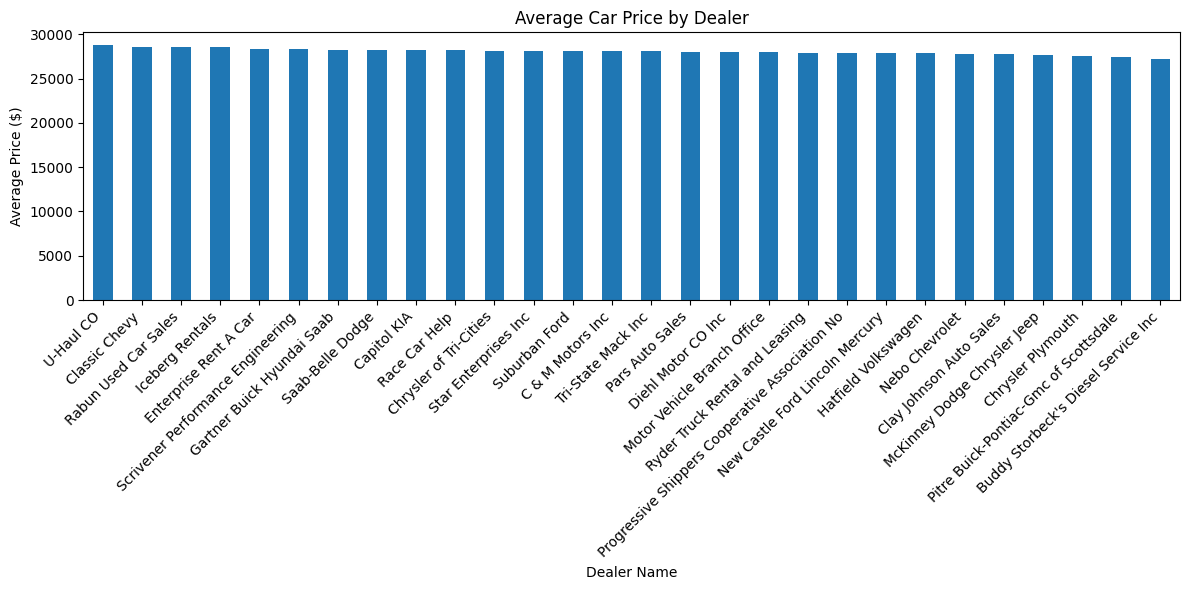

Average car price by dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.56205

In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df.groupby('Dealer_Name')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price_by_dealer.plot(kind='bar')
plt.title('Average Car Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Average car price by dealer:\n", avg_price_by_dealer)

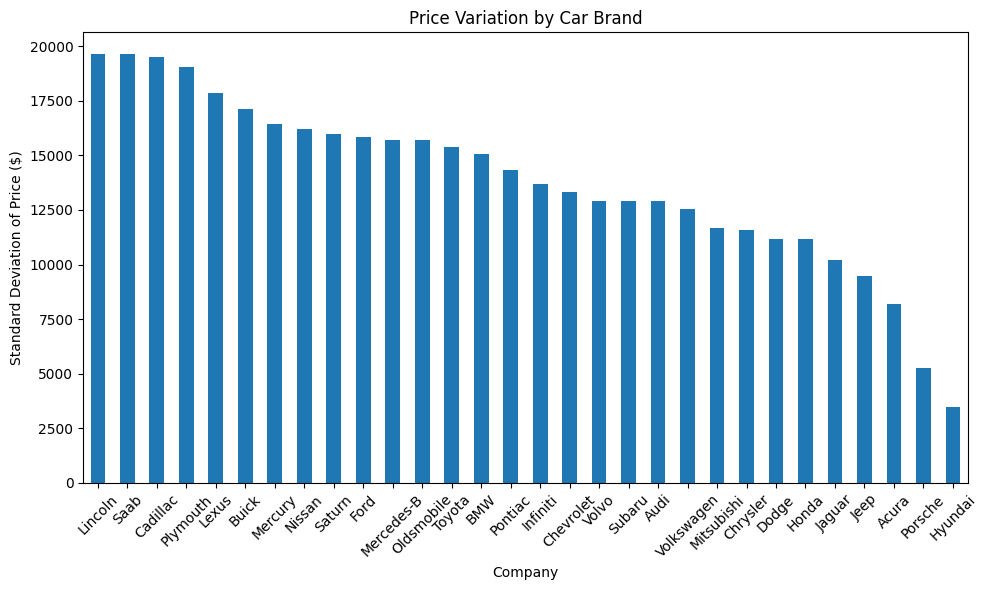

Price variation by company:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price, dtype: float64


In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation = df.groupby('Company')['Price'].std().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
price_variation.plot(kind='bar')
plt.title('Price Variation by Car Brand')
plt.xlabel('Company')
plt.ylabel('Standard Deviation of Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Price variation by company:\n", price_variation)

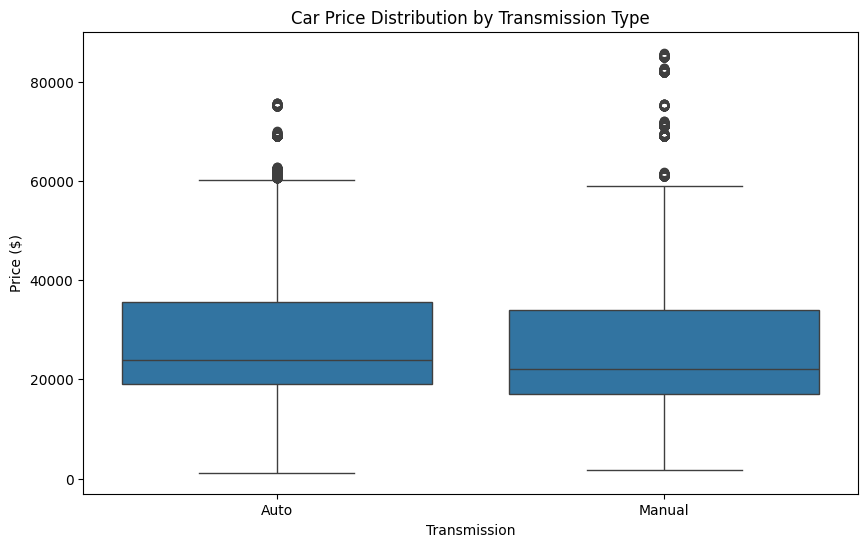

Interquartile ranges by transmission:
                  0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.show()
iqr = df.groupby('Transmission')['Price'].quantile([0.25, 0.75]).unstack()
iqr['IQR'] = iqr[0.75] - iqr[0.25]
print("Interquartile ranges by transmission:\n", iqr)

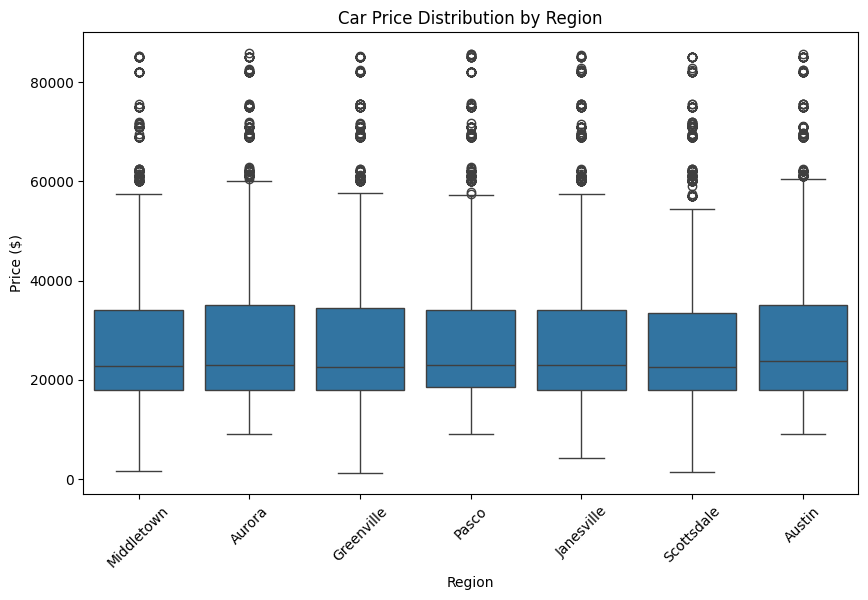

Price distribution by region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          3400

In [ ]:
#4. What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df)
plt.title('Car Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
price_by_region = df.groupby('Dealer_Region')['Price'].describe()
print("Price distribution by region:\n", price_by_region)

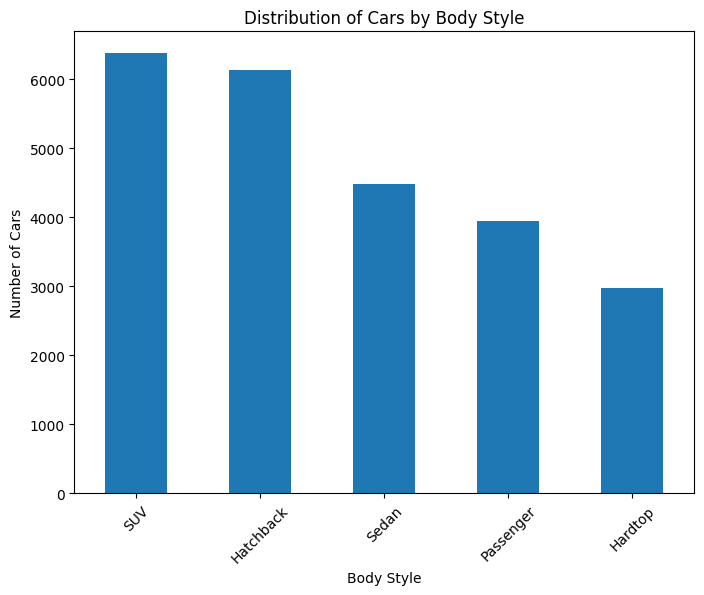

Cars by body style:
 Body_Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
#5. What is the distribution of cars based on body styles?
body_style_counts = df['Body_Style'].value_counts()
plt.figure(figsize=(8, 6))
body_style_counts.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()
print("Cars by body style:\n", body_style_counts)

<ipython-input-46-7d01fc61f9f5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_gender_income = df.groupby(['Gender', 'Income_Bracket'])['Price'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

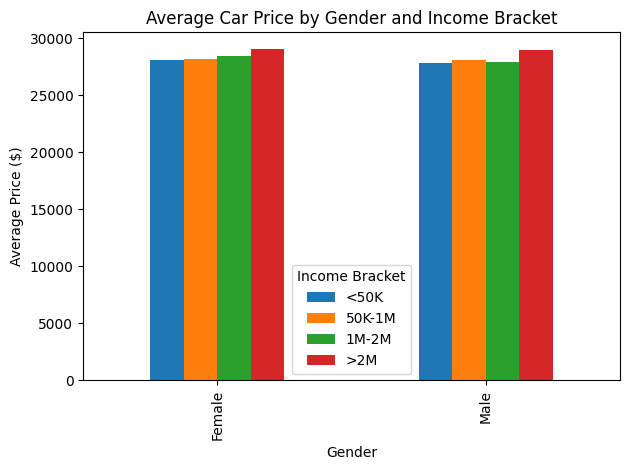

Average price by gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price, dtype: float64

Average price by gender and income bracket:
 Income_Bracket          <50K        50K-1M         1M-2M           >2M
Gender                                                                
Female          28132.038732  28194.209077  28479.225867  29073.304147
Male            27816.302247  28100.096129  27920.855837  28950.189502


In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
price_by_gender = df.groupby('Gender')['Price'].mean()
df['Income_Bracket'] = pd.cut(df['Annual_Income'], bins=[0, 50000, 1000000, 2000000, float('inf')],
                              labels=['<50K', '50K-1M', '1M-2M', '>2M'])
price_by_gender_income = df.groupby(['Gender', 'Income_Bracket'])['Price'].mean().unstack()
plt.figure(figsize=(10, 6))
price_by_gender_income.plot(kind='bar')
plt.title('Average Car Price by Gender and Income Bracket')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.legend(title='Income Bracket')
plt.tight_layout()
plt.show()
print("Average price by gender:\n", price_by_gender)
print("\nAverage price by gender and income bracket:\n", price_by_gender_income)

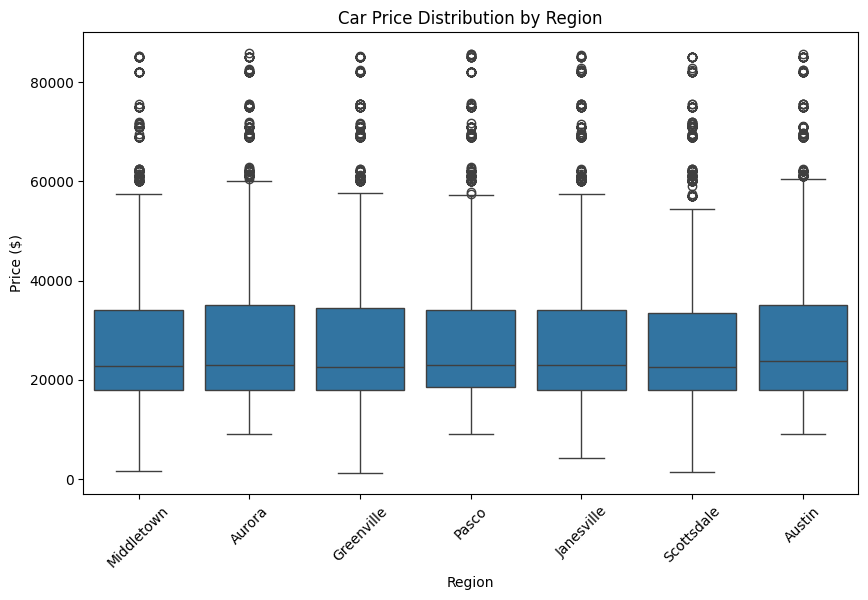

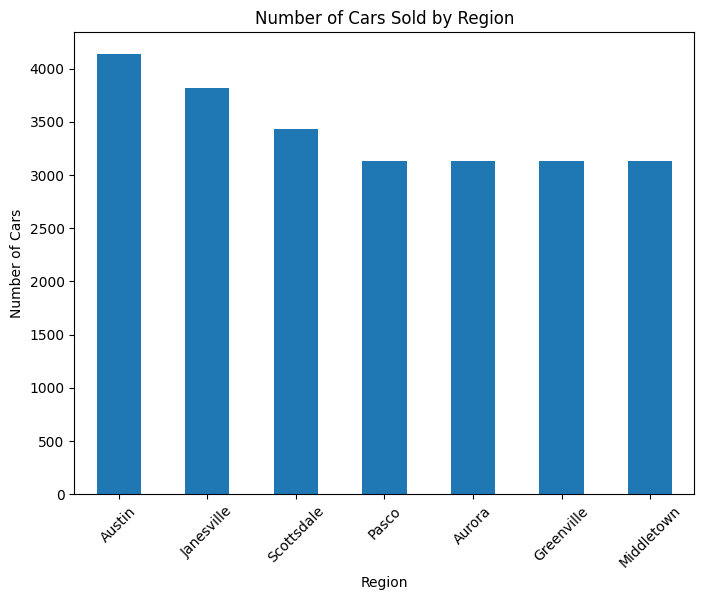

Cars sold by region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df)
plt.title('Car Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
cars_by_region = df['Dealer_Region'].value_counts()
plt.figure(figsize=(8, 6))
cars_by_region.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()
print("Cars sold by region:\n", cars_by_region)

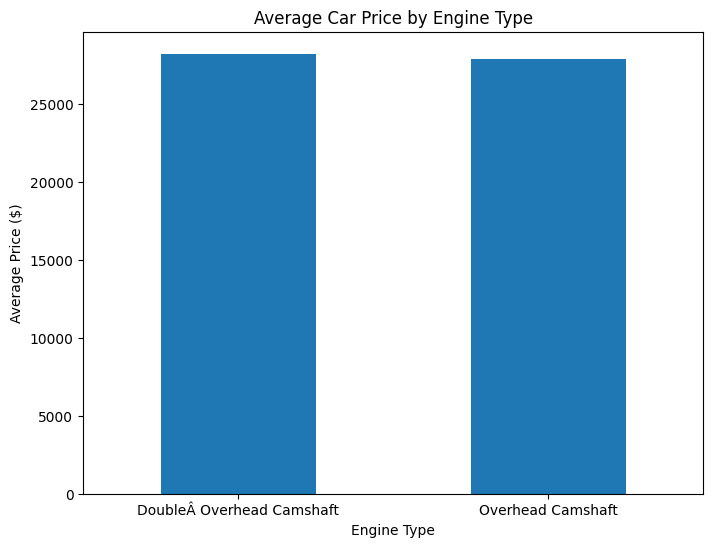

Average price by engine type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price, dtype: float64


In [ ]:
#8. How does the average car price differ between cars with different engine sizes?
price_by_engine = df.groupby('Engine')['Price'].mean()
plt.figure(figsize=(8, 6))
price_by_engine.plot(kind='bar')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()
print("Average price by engine type:\n", price_by_engine)

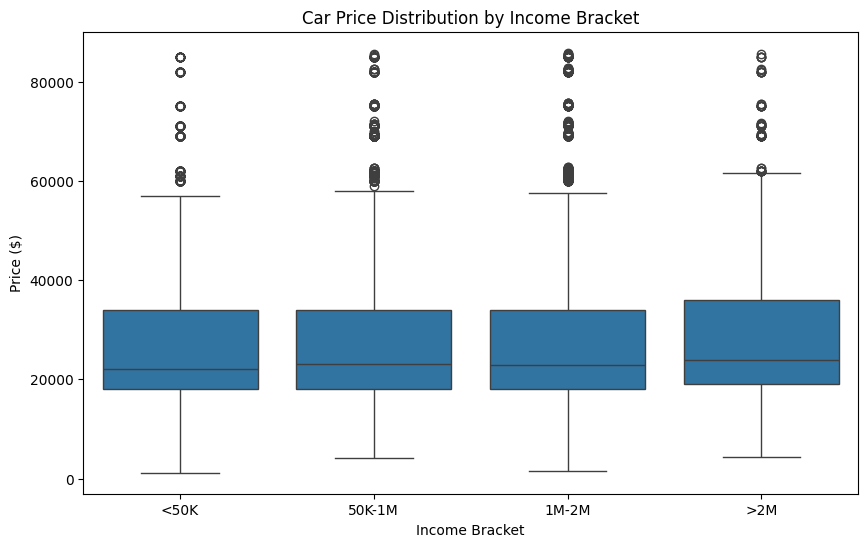

Price distribution by income bracket:
                   count          mean           std     min      25%      50%  \
Income_Bracket                                                                  
<50K             5275.0  27884.297820  14909.070561  1200.0  18000.0  22001.0   
50K-1M          11083.0  28122.921682  14812.721739  4200.0  18001.0  23000.0   
1M-2M            6207.0  28016.841147  14580.010739  1450.0  18100.0  22800.0   
>2M              1341.0  28970.111857  15054.839910  4300.0  19000.0  24000.0   

                    75%      max  
Income_Bracket                    
<50K            34000.0  85001.0  
50K-1M          34000.5  85500.0  
1M-2M           34000.0  85800.0  
>2M             36000.0  85601.0  


<ipython-input-49-cfa610fa6764>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_income = df.groupby('Income_Bracket')['Price'].describe()


In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Bracket', y='Price', data=df)
plt.title('Car Price Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.show()
price_by_income = df.groupby('Income_Bracket')['Price'].describe()
print("Price distribution by income bracket:\n", price_by_income)

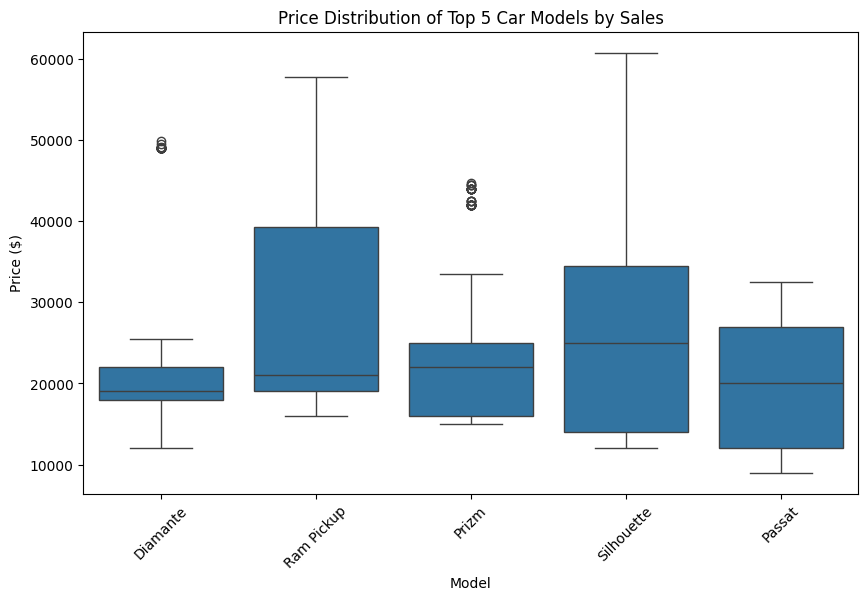

Top 5 models by sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().head(5)
top_models_data = df[df['Model'].isin(top_models.index)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price', data=top_models_data)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
print("Top 5 models by sales:\n", top_models)

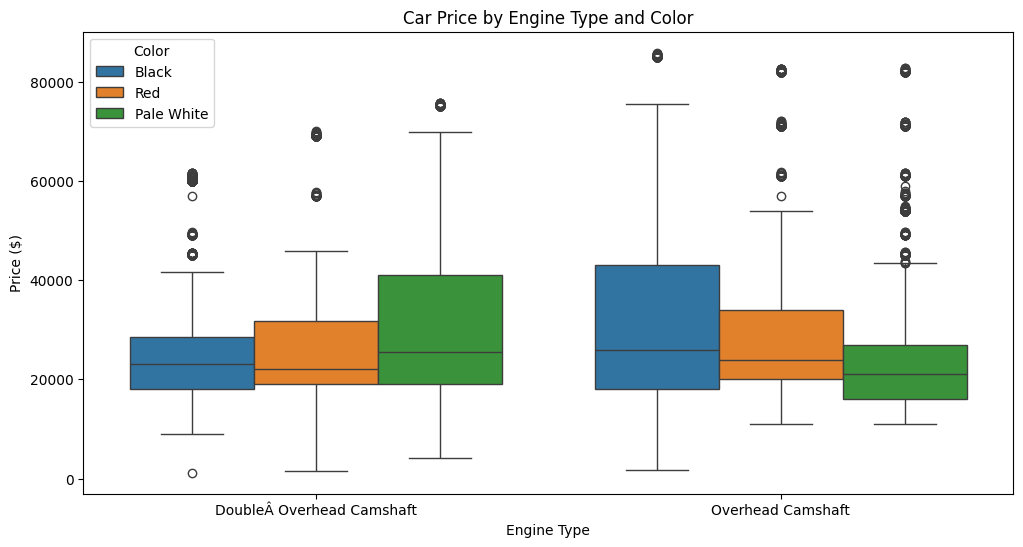

Price variation by color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price, dtype: float64


In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price', hue='Color', data=df)
plt.title('Car Price by Engine Type and Color')
plt.xlabel('Engine Type')
plt.ylabel('Price ($)')
plt.legend(title='Color')
plt.show()
price_var_by_color = df.groupby('Color')['Price'].std().sort_values(ascending=False)
print("Price variation by color:\n", price_var_by_color)

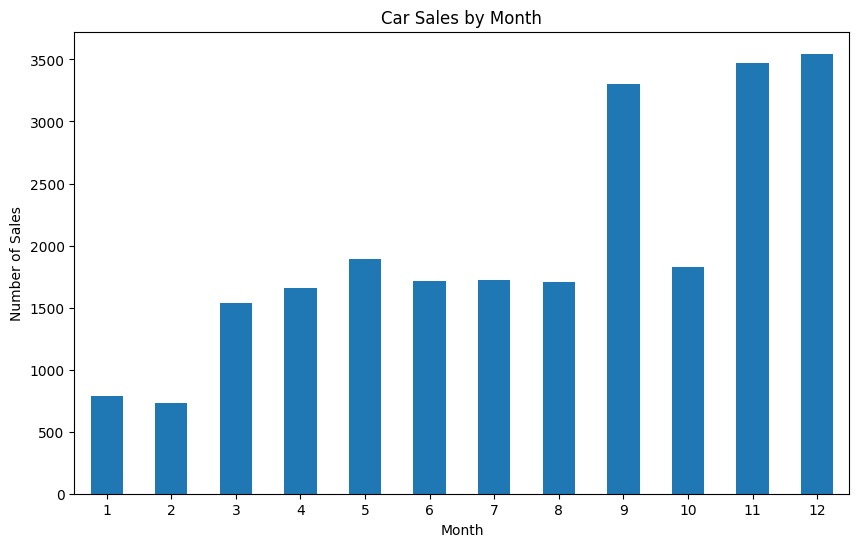

Sales by month:
 Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?
df['Month'] = df['Date'].dt.month
sales_by_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.show()
print("Sales by month:\n", sales_by_month)

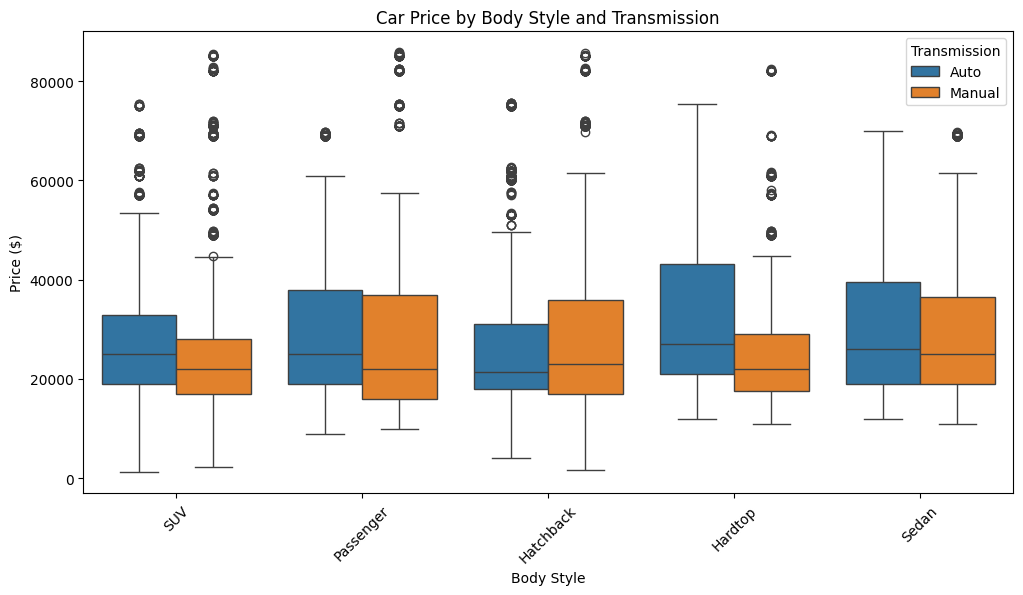

Price distribution by body style and transmission:
                           count          mean           std      min      25%  \
Body_Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.0564

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body_Style', y='Price', hue='Transmission', data=df)
plt.title('Car Price by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.show()
price_by_body_trans = df.groupby(['Body_Style', 'Transmission'])['Price'].describe()
print("Price distribution by body style and transmission:\n", price_by_body_trans)

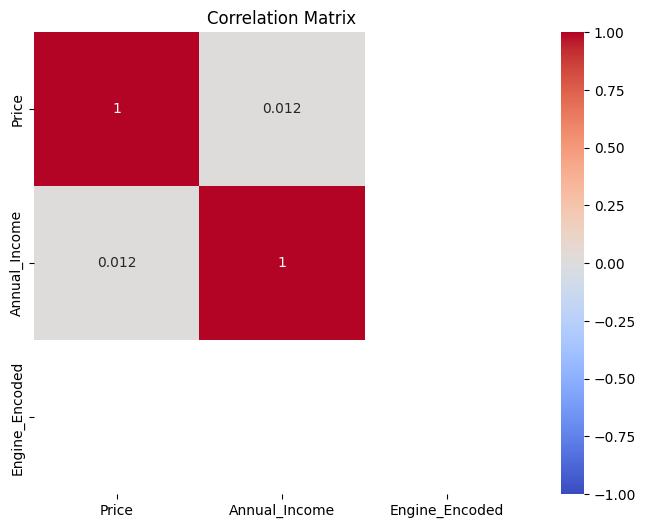

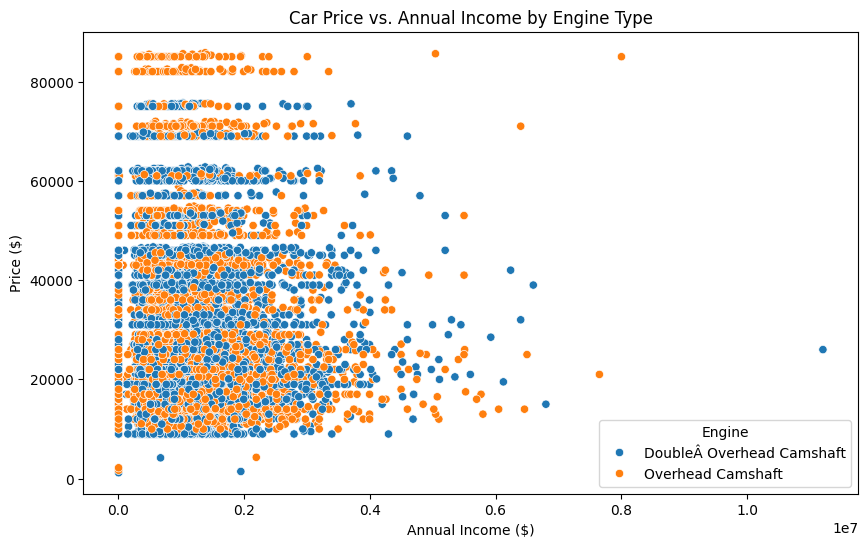

Correlation matrix:
                    Price  Annual_Income  Engine_Encoded
Price           1.000000       0.012065             NaN
Annual_Income   0.012065       1.000000             NaN
Engine_Encoded       NaN            NaN             NaN


In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df['Engine_Encoded'] = df['Engine'].map({'Double Overhead Camshaft': 1, 'Overhead Camshaft': 0})
numeric_cols = ['Price', 'Annual_Income', 'Engine_Encoded']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Price', hue='Engine', data=df)
plt.title('Car Price vs. Annual Income by Engine Type')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.show()
print("Correlation matrix:\n", correlation_matrix)

<Figure size 1200x600 with 0 Axes>

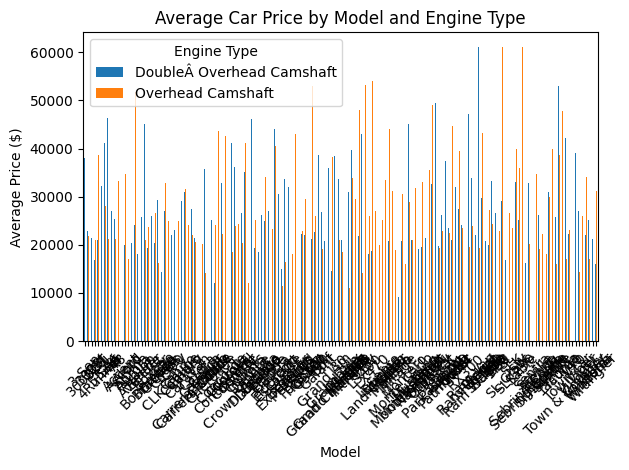

Average price by model and engine type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


In [ ]:
#15. How does the average car price vary across different car models and engine types?
price_by_model_engine = df.groupby(['Model', 'Engine'])['Price'].mean().unstack()
plt.figure(figsize=(12, 6))
price_by_model_engine.plot(kind='bar', stacked=False)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Model')
plt.ylabel('Average Price ($)')
plt.legend(title='Engine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Average price by model and engine type:\n", price_by_model_engine)

In [1]:
### EDA - 3

Dataset loaded successfully!
Price distribution plot saved as 'price_distribution.png'


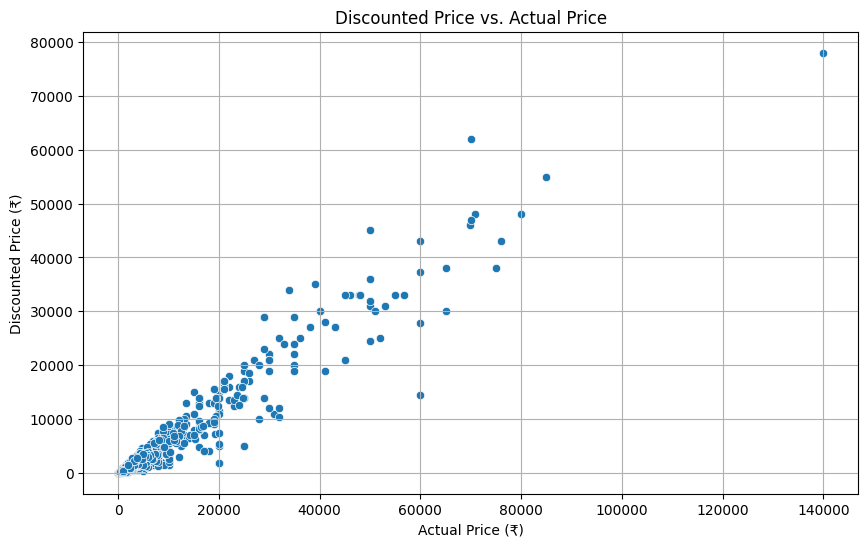


1. Average Rating by Category:
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000

2. Top Rating Count Products by Category:
        main_category                                                                                                                                                                                            product_name  rating_count
        Car&Motorbike                       Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black        1118.0
Computers&Accessories                                                                                                                

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

# Function to clean price columns
def clean_price_column(series):
    try:
        # Remove ₹ and commas, convert to float
        return series.str.replace('[₹,]', '', regex=True).astype(float)
    except Exception as e:
        print(f"Error cleaning price column: {e}")
        return series

# Function to clean percentage column
def clean_percentage_column(series):
    try:
        return series.str.replace('%', '', regex=True).astype(float)
    except Exception as e:
        print(f"Error cleaning percentage column: {e}")
        return series

# Function to clean rating count column
def clean_rating_count_column(series):
    try:
        return series.str.replace(',', '', regex=True).astype(float)
    except Exception as e:
        print(f"Error cleaning rating count column: {e}")
        return series

# Function to extract keywords from product names
def extract_keywords(text):
    if not isinstance(text, str):
        return []
    # Convert to lowercase, remove special characters, split into words
    words = re.findall(r'\b\w+\b', text.lower())
    # Remove common stop words
    stop_words = {'for', 'with', 'and', 'to', 'in', 'of', 'a', 'the', 'or', 'on', 'at', 'by'}
    return [word for word in words if word not in stop_words and len(word) > 2]

# Read the CSV file
try:
    df = pd.read_csv('amazon.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'amazon.csv' not found. Please upload the file.")
    raise
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[\(\)%]', '', regex=True)

# Verify required columns
required_columns = ['product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'review_content']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns: {missing_columns}")
    raise ValueError("Required columns are missing from the dataset.")

# Clean data
df['discounted_price'] = clean_price_column(df['discounted_price'])
df['actual_price'] = clean_price_column(df['actual_price'])
df['discount_percentage'] = clean_percentage_column(df['discount_percentage'])
df['rating_count'] = clean_rating_count_column(df['rating_count'])
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Handle category column
df['main_category'] = df['category'].str.split('|').str[0]

# 1. Average rating for each product category
avg_rating_by_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)

# 2. Top rating_count products by category
top_rating_count_by_category = df.groupby(['main_category', 'product_name'])['rating_count'].max().reset_index()
top_rating_count_by_category = top_rating_count_by_category.sort_values(['main_category', 'rating_count'], ascending=[True, False])
top_rating_count_by_category = top_rating_count_by_category.groupby('main_category').head(1)

# 3. Distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.grid(True)
try:
    plt.savefig('price_distribution.png')
    print("Price distribution plot saved as 'price_distribution.png'")
except Exception as e:
    print(f"Error saving plot: {e}")
plt.show()

# 4. Average discount percentage by category
avg_discount_by_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# 5. Most popular product names
popular_products = df['product_name'].value_counts().head(5)

# 6. Most popular product keywords
all_keywords = []
for name in df['product_name']:
    all_keywords.extend(extract_keywords(name))
keyword_counts = Counter(all_keywords)
popular_keywords = keyword_counts.most_common(10)

# 7. Most popular product reviews
popular_reviews = df['review_content'].value_counts().head(5)

# 8. Correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'], method='pearson')

# 9. Top 5 categories based on highest ratings
top_categories_by_rating = avg_rating_by_category.head(5)

# 10. Areas for improvement (based on low ratings and review analysis)
low_rated_products = df[df['rating'] < 3.5][['product_name', 'main_category', 'rating', 'review_content']]
improvement_areas = low_rated_products.groupby('main_category').agg({
    'product_name': 'count',
    'review_content': lambda x: list(x)
}).rename(columns={'product_name': 'low_rated_count'})

# Print results
print("\n1. Average Rating by Category:")
print(avg_rating_by_category.to_string())
print("\n2. Top Rating Count Products by Category:")
print(top_rating_count_by_category.to_string(index=False))
print("\n3. Distribution of Discounted vs. Actual Prices: See plot above and 'price_distribution.png'")
print("\n4. Average Discount Percentage by Category:")
print(avg_discount_by_category.to_string())
print("\n5. Most Popular Product Names:")
print(popular_products.to_string())
print("\n6. Most Popular Product Keywords:")
for keyword, count in popular_keywords:
    print(f"{keyword}: {count}")
print("\n7. Most Popular Product Reviews:")
print(popular_reviews.to_string())
print(f"\n8. Correlation between Discounted Price and Rating: {correlation:.4f}")
print("\n9. Top 5 Categories by Rating:")
print(top_categories_by_rating.to_string())
print("\n10. Areas for Improvement:")
print(improvement_areas.to_string())
print("\nDetailed Low-Rated Products:")

In [20]:
### EDA - 4

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

# Function to clean duration column
def clean_duration_column(series):
    try:
        return series.astype(float)
    except Exception as e:
        print(f"Error cleaning duration column: {e}")
        return series

# Function to clean popularity column
def clean_popularity_column(series):
    try:
        return series.astype(float)
    except Exception as e:
        print(f"Error cleaning popularity column: {e}")
        return series

# Function to extract keywords from track names
def extract_keywords(text):
    if not isinstance(text, str):
        return []
    # Convert to lowercase, remove special characters, split into words
    words = re.findall(r'\b\w+\b', text.lower())
    # Remove common stop words and short words
    stop_words = {'feat', 'with', 'and', 'the', 'a', 'in', 'of', 'to', 'from', 'for', 'on', 'at', 'by', 'remix', 'version', 'explicit', 'bonus', 'track'}
    return [word for word in words if word not in stop_words and len(word) > 2]

# Read the CSV file
try:
    df = pd.read_csv('spotify.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'spotify.csv' not found. Please ensure the file is uploaded.")
    raise
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Verify required columns
required_columns = ['artist', 'track_name', 'popularity', 'duration_ms', 'track_id']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns: {missing_columns}")
    raise ValueError("Required columns are missing from the dataset.")

# Clean data
df['popularity'] = clean_popularity_column(df['popularity'])
df['duration_ms'] = clean_duration_column(df['duration_ms'])

# Handle missing or invalid data
df = df.dropna(subset=['artist', 'track_name', 'popularity', 'duration_ms'])

# Convert duration to seconds for readability
df['duration_s'] = df['duration_ms'] / 1000

# 1. Average popularity for each artist
avg_popularity_by_artist = df.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# 2. Top popularity tracks by artist
top_popularity_by_artist = df.groupby(['artist', 'track_name'])['popularity'].max().reset_index()
top_popularity_by_artist = top_popularity_by_artist.sort_values(['artist', 'popularity'], ascending=[True, False])
top_popularity_by_artist = top_popularity_by_artist.groupby('artist').head(1)

# 3. Distribution of duration vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_s', y='popularity', data=df)
plt.title('Track Duration vs. Popularity')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity Score')
plt.grid(True)
try:
    plt.savefig('duration_vs_popularity.png')
    print("Duration vs. popularity plot saved as 'duration_vs_popularity.png'")
except Exception as e:
    print(f"Error saving plot: {e}")
plt.show()

# 4. Average duration by artist
avg_duration_by_artist = df.groupby('artist')['duration_s'].mean().sort_values(ascending=False)

# 5. Most popular track names
popular_tracks = df['track_name'].value_counts().head(5)

# 6. Most popular track keywords
all_keywords = []
for name in df['track_name']:
    all_keywords.extend(extract_keywords(name))
keyword_counts = Counter(all_keywords)
popular_keywords = keyword_counts.most_common(10)

# 7. Duplicate tracks
duplicate_tracks = df[df.duplicated(subset=['track_name'], keep=False)][['track_name', 'artist', 'popularity']].sort_values('track_name')

# 8. Correlation between duration and popularity
correlation = df['duration_s'].corr(df['popularity'], method='pearson')

# 9. Top 5 artists by average popularity
top_artists_by_popularity = avg_popularity_by_artist.head(5)

# 10. Areas for improvement (based on low-popularity tracks)
low_popularity_tracks = df[df['popularity'] < 60][['track_name', 'artist', 'popularity', 'duration_s']]
improvement_areas = low_popularity_tracks.groupby('artist').agg({
    'track_name': 'count',
    'popularity': 'mean'
}).rename(columns={'track_name': 'low_popularity_count', 'popularity': 'avg_low_popularity'})

# Print results
print("\n1. Average Popularity by Artist:")
print(avg_popularity_by_artist.to_string())
print("\n2. Top Popularity Tracks by Artist:")
print(top_popularity_by_artist.to_string(index=False))
print("\n3. Distribution of Duration vs. Popularity: See plot above and 'duration_vs_popularity.png'")
print("\n4. Average Duration by Artist (seconds):")
print(avg_duration_by_artist.to_string())
print("\n5. Most Popular Track Names:")
print(popular_tracks.to_string())
print("\n6. Most Popular Track Keywords:")
for keyword, count in popular_keywords:
    print(f"{keyword}: {count}")
print("\n7. Duplicate Tracks:")
print(duplicate_tracks.to_string(index=False))
print(f"\n8. Correlation between Duration and Popularity: {correlation:.4f}")
print("\n9. Top 5 Artists by Average Popularity:")
print(top_artists_by_popularity.to_string())
print("\n10. Areas for Improvement (Low-Popularity Tracks):")
print(improvement_areas.to_string())
print("\nDetailed Low-Popularity Tracks:")
for _, row in low_popularity_tracks.iterrows():
    print(f"Track: {row['track_name']}, Artist: {row['artist']}, Popularity: {row['popularity']}, Duration: {row['duration_s']:.2f}s")

Error: 'spotify.csv' not found. Please ensure the file is uploaded.


FileNotFoundError: [Errno 2] No such file or directory: 'spotify.csv'

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Upload the CSV file
print("Please upload 'spotify.csv.csv'")
uploaded = files.upload()

# Check uploaded files
print("Uploaded files:", uploaded.keys())

# Read the CSV file
df = pd.read_csv('spotify.csv.csv')

# Display column names to diagnose
print("Column names in the dataset:", df.columns.tolist())

# Clean column names (remove spaces, special characters)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('ms', 'ms')

# Verify column names after cleaning
print("Column names after cleaning:", df.columns.tolist())

# Check if key column 'Popularity' exists
if 'Popularity' not in df.columns:
    print("Error: 'Popularity' column not found. Available columns:", df.columns.tolist())
else:
    print("'Popularity' column found, proceeding with analysis.")

# Clean 'Duration_ms' by converting to numeric, if necessary
df['Duration_ms'] = pd.to_numeric(df['Duration_ms'], errors='coerce')

# Convert 'Duration_ms' to seconds for easier interpretation
df['Duration_s'] = df['Duration_ms'] / 1000

# Display first few rows and info
print("\nDataset loaded successfully!")
print(df.head)

Please upload 'spotify.csv.csv'


Saving spotify.csv.csv to spotify.csv.csv
Uploaded files: dict_keys(['spotify.csv.csv'])
Column names in the dataset: ['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']
Column names after cleaning: ['Artist', 'Track_Name', 'Popularity', 'Duration_ms', 'Track_ID']
'Popularity' column found, proceeding with analysis.

Dataset loaded successfully!
<bound method NDFrame.head of              Artist                                         Track_Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fa

In [32]:
# 1. Check for null values and handle if present
print("Missing values:\n", df.isnull().sum())
# If null values exist, we can drop or impute (e.g., mean for numerical, mode for categorical)
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df = df.dropna()  # Dropping rows with any nulls (adjust based on specific needs)
    print("Missing values after handling:\n", df.isnull().sum())
else:
    print("No missing values found.")

Missing values:
 Artist         0
Track_Name     0
Popularity     0
Duration_ms    0
Track_ID       0
Duration_s     0
dtype: int64
No missing values found.


In [33]:
# 2. Check for duplicate rows and handle if present
print("\nNumber of duplicate rows:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()
    print("Number of duplicate rows after handling:", df.duplicated().sum())
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


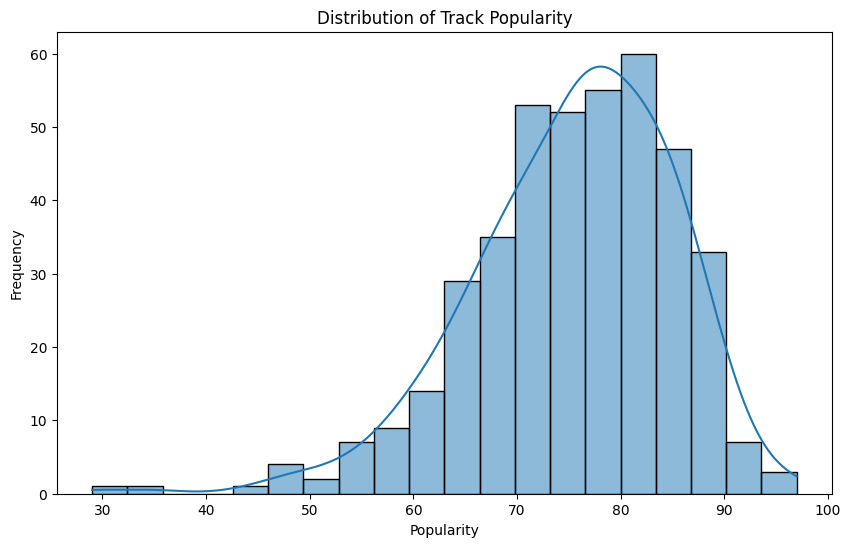

In [34]:
# 3. Distribution of popularity among tracks (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

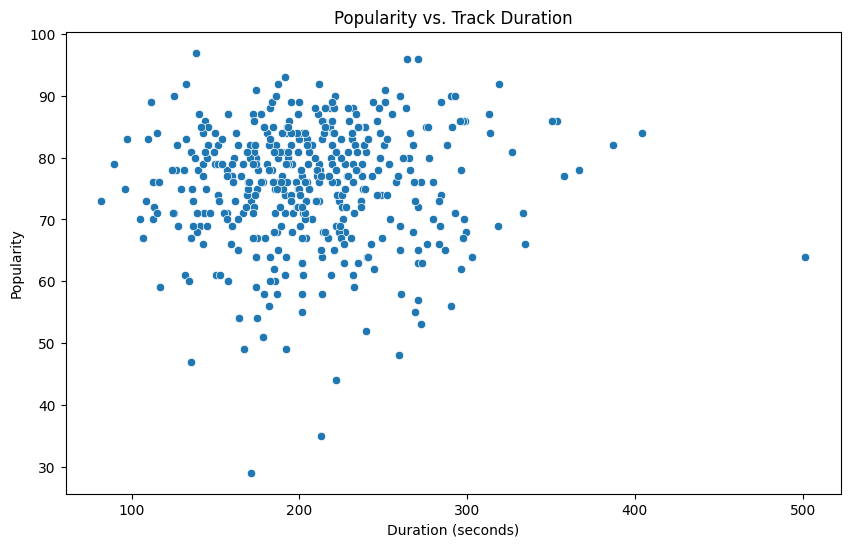

In [35]:
# 4. Relationship between popularity and duration (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_s', y='Popularity', data=df)
plt.title('Popularity vs. Track Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity')
plt.show()

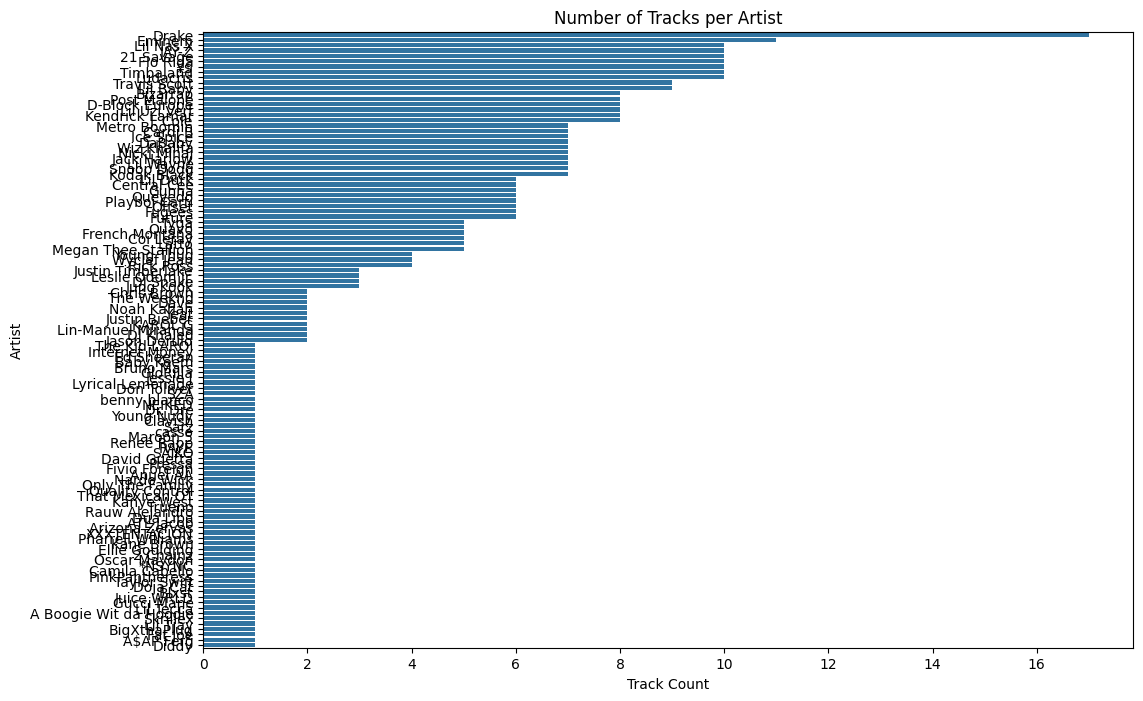

Artist with the highest number of tracks: Drake (17 tracks)


In [37]:
# 5. Artist with the highest number of tracks (Countplot)
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()
# Print the artist with the most tracks
top_artist = df['Artist'].value_counts().idxmax()
top_artist_count = df['Artist'].value_counts().max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_artist_count} tracks)")

In [38]:
# 6. Top 5 least popular tracks (Artist and Track Name)
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track_Name', 'Popularity']]
print("\nTop 5 least popular tracks:")
print(least_popular)


Top 5 least popular tracks:
             Artist                     Track_Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [39]:
# 7. Average popularity for the top 5 most popular artists
# Get top 5 artists by number of tracks
top_5_artists = df['Artist'].value_counts().head(5).index
# Calculate average popularity for these artists
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nAverage popularity for top 5 artists (by track count):")
print(avg_popularity)
# Identify the artist with the highest average popularity
top_avg_artist = avg_popularity.idxmax()
top_avg_value = avg_popularity.max()
print(f"Artist with the highest average popularity: {top_avg_artist} ({top_avg_value:.2f})")


Average popularity for top 5 artists (by track count):
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64
Artist with the highest average popularity: 21 Savage (83.80)


In [40]:
# 8. Most popular tracks for the top 5 most popular artists
most_popular_tracks = df[df['Artist'].isin(top_5_artists)].groupby('Artist').apply(
    lambda x: x.loc[x['Popularity'].idxmax()][['Track_Name', 'Popularity']]
).reset_index()
print("\nMost popular tracks for top 5 artists (by track count):")
print(most_popular_tracks[['Artist', 'Track_Name', 'Popularity']])


Most popular tracks for top 5 artists (by track count):
      Artist                               Track_Name  Popularity
0  21 Savage                                   redrum          96
1      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
2     Eminem                               Without Me          90
3      JAY-Z                          Ni**as In Paris          86
4  Lil Nas X                        THATS WHAT I WANT          81


<ipython-input-40-a79512bf8b75>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_tracks = df[df['Artist'].isin(top_5_artists)].groupby('Artist').apply(


<Figure size 1000x800 with 0 Axes>

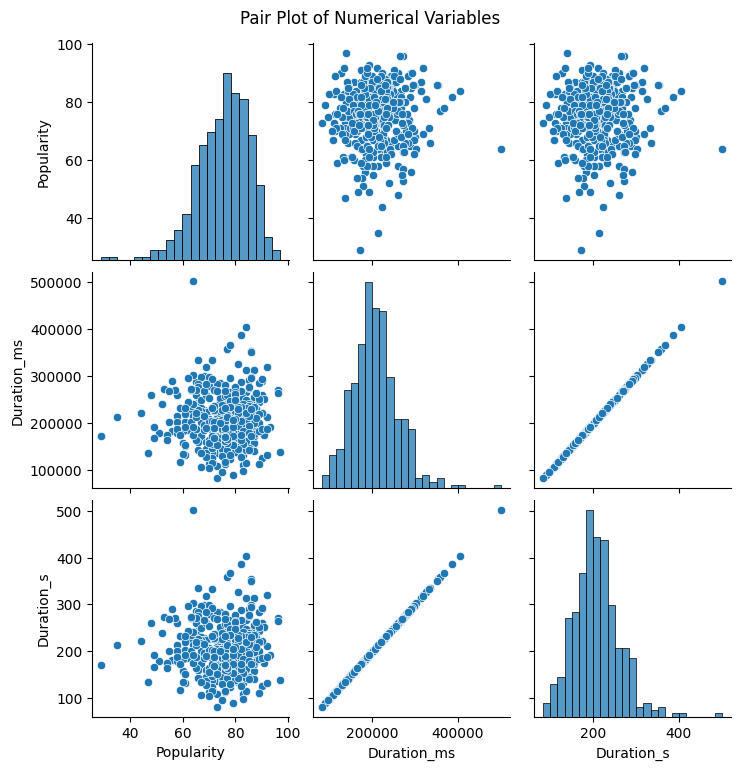

In [41]:
# 9. Pair plot for numerical variables
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Popularity', 'Duration_ms', 'Duration_s']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

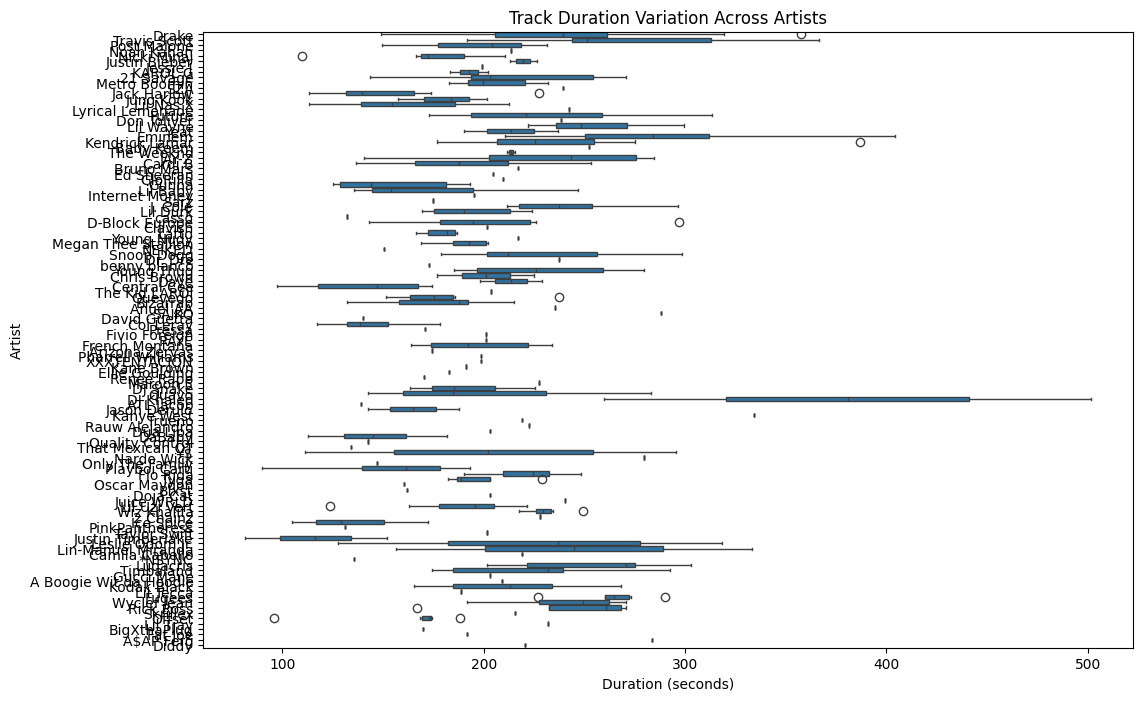

In [42]:
# 10. Duration variation across artists (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(y='Artist', x='Duration_s', data=df)
plt.title('Track Duration Variation Across Artists')
plt.xlabel('Duration (seconds)')
plt.ylabel('Artist')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be plac

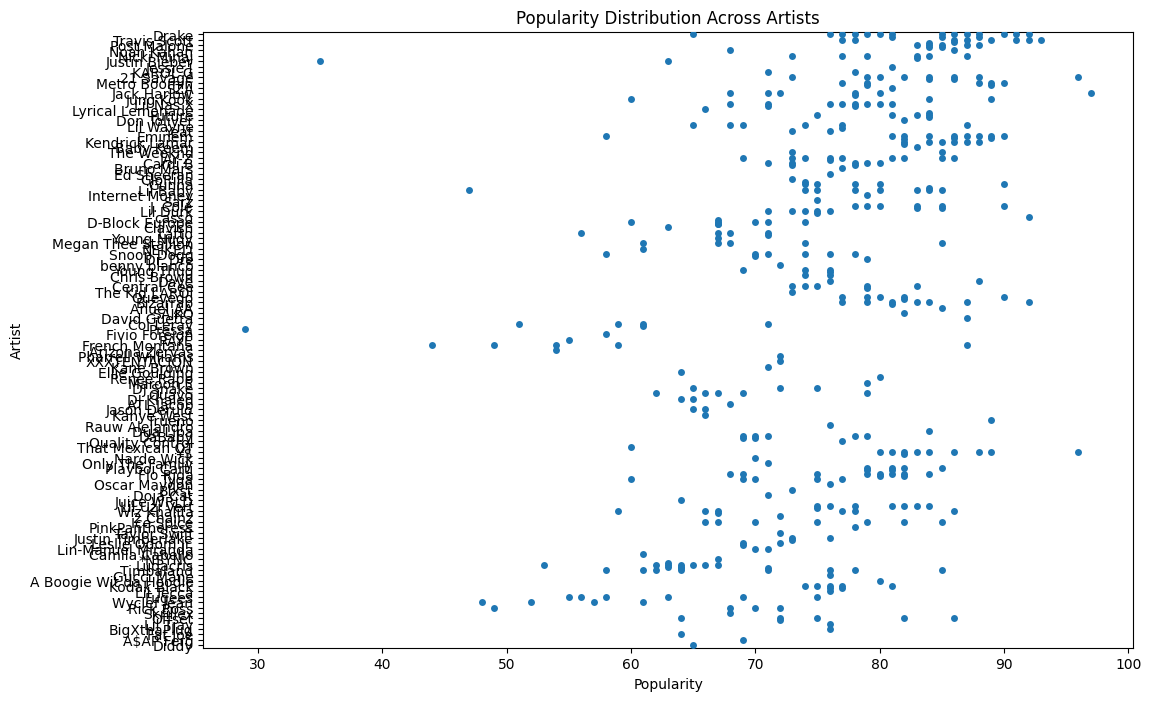

In [43]:
# 11. Distribution of track popularity across artists (Swarm Plot)
plt.figure(figsize=(12, 8))
sns.swarmplot(y='Artist', x='Popularity', data=df, size=5)
plt.title('Popularity Distribution Across Artists')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.show()